# Will They Click? Predicting Ad Engagement with Machine Learning

Written and explored by: Kyle Mair || Data Scientist


In this project I explore simulted real-word data on advertisements, and predict consumer engagement with website advertisments. My discoveries in this project are very real and applicable to marketing strategies by companies to have consumers engage with their advertisements. 

In this project I leverage **Python (Numpy, Pandas, Matplotlib, Seaborn, and Scikit-Learn)**, and I create a **Logistic Regression Model** using **Machine Learning** to predict if a website user will click on a certain advertisement. The discoveries in this project could help a business generate thousands of more dollars in revenue and drive consumerism. I also display a beautiful dashboard in **Tableau** for the insights and data that was discovered during the project. To find the orignal code and the Jupyter Notebook the Logistic Model was created in you can find it on my GitHub Repository Portfolio here. To see the Tableau Dashboard I created you can view it on [my Tableau Public Page here](https://public.tableau.com/app/profile/kyle.mair/viz/user_ad_click_analysis/Understandingourwebsiteuserscharacteristics?publish=yes).

>In this project, I use **Python** and **Logistic Regression** to predict whether website users will click on ads based on their features, and create a **Tableau Dashboard** to share insights visually. These **Data Science** insights can help businesses optimize ad targeting and boost revenue through better consumer engagement.

## The dataset and the approach
I thought it would be useful to include this section for the part of my audience that were interested in the datasets I used in my exploration. Otherwise, feel free to skip ahead to “Part 3 – Building The Logistic Regression Model”, as the sections after this one can be skipped to for immediate reading about the model I created and insights I found about which customers are most likely to click on the advertisment!

The datasets used in this exploration were inspired and made available from the Udemy online platform in my time pursuing the *Python for Data Science and Machine Learning Bootcamp* by Jose Portilla. This is the platform I originally created this project on.

### advertising.csv
This was the dataset I used throughout the project to explore in Tableau and build the Logistic Regression Model with. This dataset originally comes from Kaggle. This dataset was originally cleaned, so in this project it will be used mainly for exploration and building a Machine Learning model. You can check out my other projects on my GitHub for better examples of me cleaning and wrangling data as a first step. This dataset has 1000 rows and 10 different columns:
1. `Daily Time Spend on Site` - Stores data on the average time in minutes the user spends on the companies main website daily (e.g. 68.95, 80.23, 69.47) and is a datatype float.
2.  `Age` - Stores data on the age in years for the user that used the company website in that record, and is a datatype integer.
3. `Area Income` - Is the average income of the geographical area for the website user. Is a datatype float.
4. `Daily Internet Usage` - Is the average minutes a day the consumer is on the internet. Is a datatype float.
5. `Ad Topic Line` - This is the headline of the advertisement. Is datatype string.
6. `City` - This is the City that the user is located in. Is datatype string.
7. `Male` - This is the sex (gender) of the website user (e.g. Male, Female). Is a datatype string.
8. `Country` - This is the Country that the user is located in. Is a datatype string.
9. `Timestamp` - Time in which the user either clicked on ad or closed the window. This is datatype string (will convert it to timestamp later).
10. `Clicked on Ad` - This column gives a "Yes" or "No" for if the user clicked on an ad (Yes) or did not click on an ad (No) before leaving the website window.

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [119]:
df = pd.read_csv("advertising.csv")

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Sex                       1000 non-null   object 
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


## Exploratory Analysis

As we saw the `Timestamp` column is currently a string datatype, so I will first convert this column into a datetime datatype.

___

In [122]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

---
Next, I will look at the descriptive statistics of all the numeric columns in the dataset and analyze the results.
___

In [123]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100
std,15.853615,8.785562,13414.634022,43.902339
min,32.600000,19.000000,13996.500000,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,79484.800000,269.960000


---

I will now explain the descriptive statistics from above. <br>
`Daily Time Spend on Site` - The majority of users spend around 1 hour on the site daily, and there is a moderate spread of around 15-16 minutes from users (Coefficient of Variation = 25%). Majority of users spend between 51 - 78 minutes on the website daily.<br>
`Age` - The user with the lowest age is 19 years old and the user with the highest age is 61 years old. Most users fall between 29 years old and 42 years old. There is also a moderate spread in ages of around 8-9 years from website users (Coefficeint of Variation = 25%).<br>
`Area Income` - The user with the lowest average income for their area is around 13,414.63 dollars, and the user with the highest average income for the area they live in is around 79,484.80 dollars. For the average income of the area the users live in, most users live in an area that on average generates income between 47,031.80 and 65,470.64 dollars. There is a moderate spread in ages of around 13,414 dollars between users (Coefficient of Variation = 24%).<br>
`Daily Internet Usage` - The user with the lowest average daily internet usage is around 104 minutes. The user with the highest average daily internet usage is around 269 minutes. Most users fall between spending 139 minutes to 218 minutes on the internet on average daily. This is a moderate spread (Coefficient of Variation = 24%). <br>

I next wanted to check the distribution of the ages in the dataset. Below I created a chart to show this distribution, and I also created a hue in the dataset to distinguish the users who clicked on an ad (orange), from those who did not click on the ad (blue). There is a slight right skewness in the overall distribution indicating that there are outlier users that are much older that our median user age of 35 years old. From our distribution of ages it also appears that those who did click on an ad where older, than those who did not click on an ad.


___

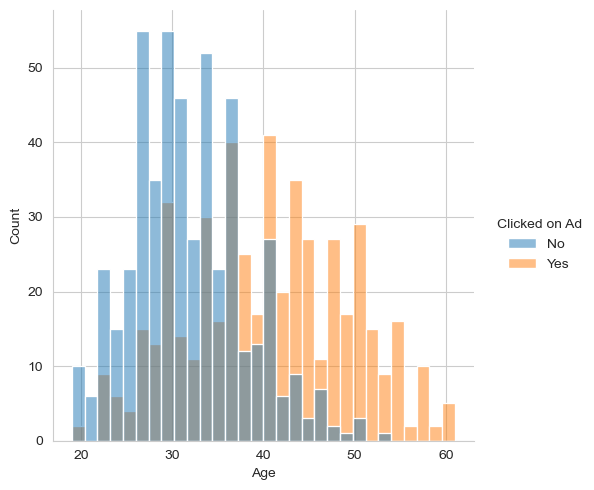

In [124]:
sns.displot(data=df, x='Age', bins=30, hue='Clicked on Ad')

---

I wanted to visually observe the relationship between Age of the user and the average area income in US Dollars for where they live. I created a visualization below to display this relationship. I also found the Pearson correlation coefficient between the two variables to be -0.183 which indicates a weak inverse relationship between the two variables. Essentially, the relationship is weak that as the age of the user increases the average income of the area they live in decreases.


___

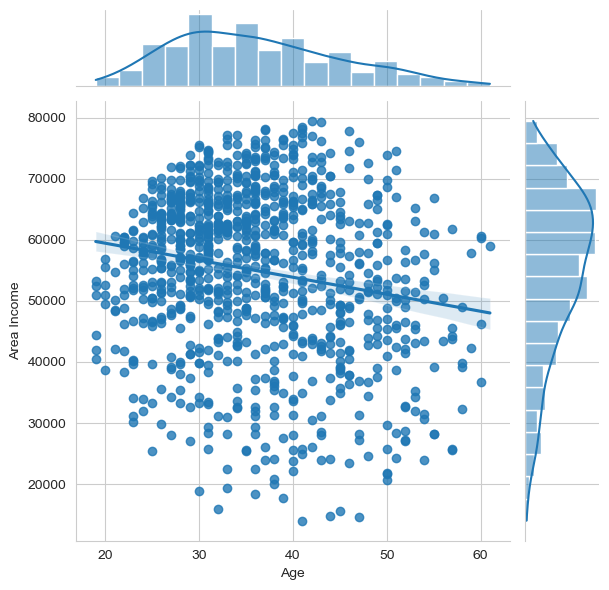

In [125]:
sns.jointplot(data=df, x='Age',y='Area Income', kind='reg')

In [126]:
df[['Area Income','Age']].corr(numeric_only=True)

,Area Income,Age
Area Income,1.000000,-0.182605
Age,-0.182605,1.000000


---

After those last discoveries I wanted to next look at how age may be correlated with average amount of time the user normally uses the internet. The chart below displays the relationship visually. I also found the Pearson correlation coefficient between the two variables to be -0.37. This indicates a moderate negative relationship between the two variables. Essentially, as the age of the user increases on average they tend to use less internet on average daily, and this is supported with a moderate strength.


___

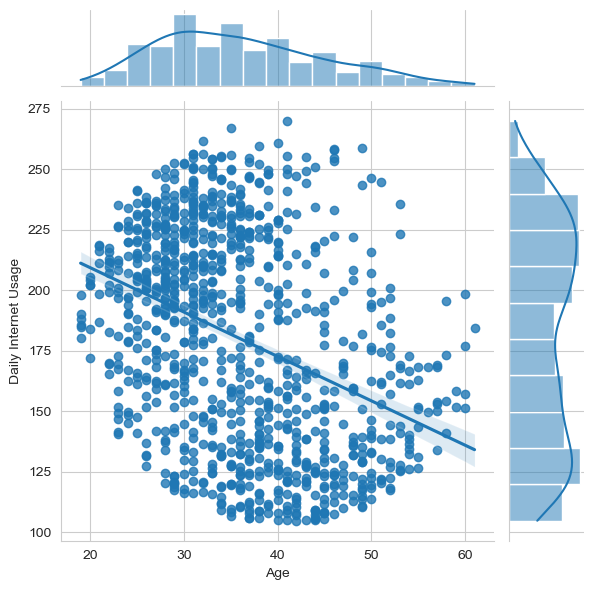

In [127]:
sns.jointplot(data=df, x='Age', y='Daily Internet Usage', kind='reg')

In [128]:
df[['Age', 'Daily Internet Usage']].corr(numeric_only=True)

,Age,Daily Internet Usage
Age,1.000000,-0.367209
Daily Internet Usage,-0.367209,1.000000


---

At this point I decided to look at all the paired relationships between each variable with each variable. I also added a hue to split the data by if the user clicked on the ad (Orange) and if the user did not click on the ad (Blue). Suprisingly, from the visual I discovered that users who spent lesser time on the site tended to click on the ad. I also discovered that users who clicked on the ad tended to have a lower average area income than those that did not. There are a lot of different insights to make from the visualization below, and I won't explain all of them in this section.

___

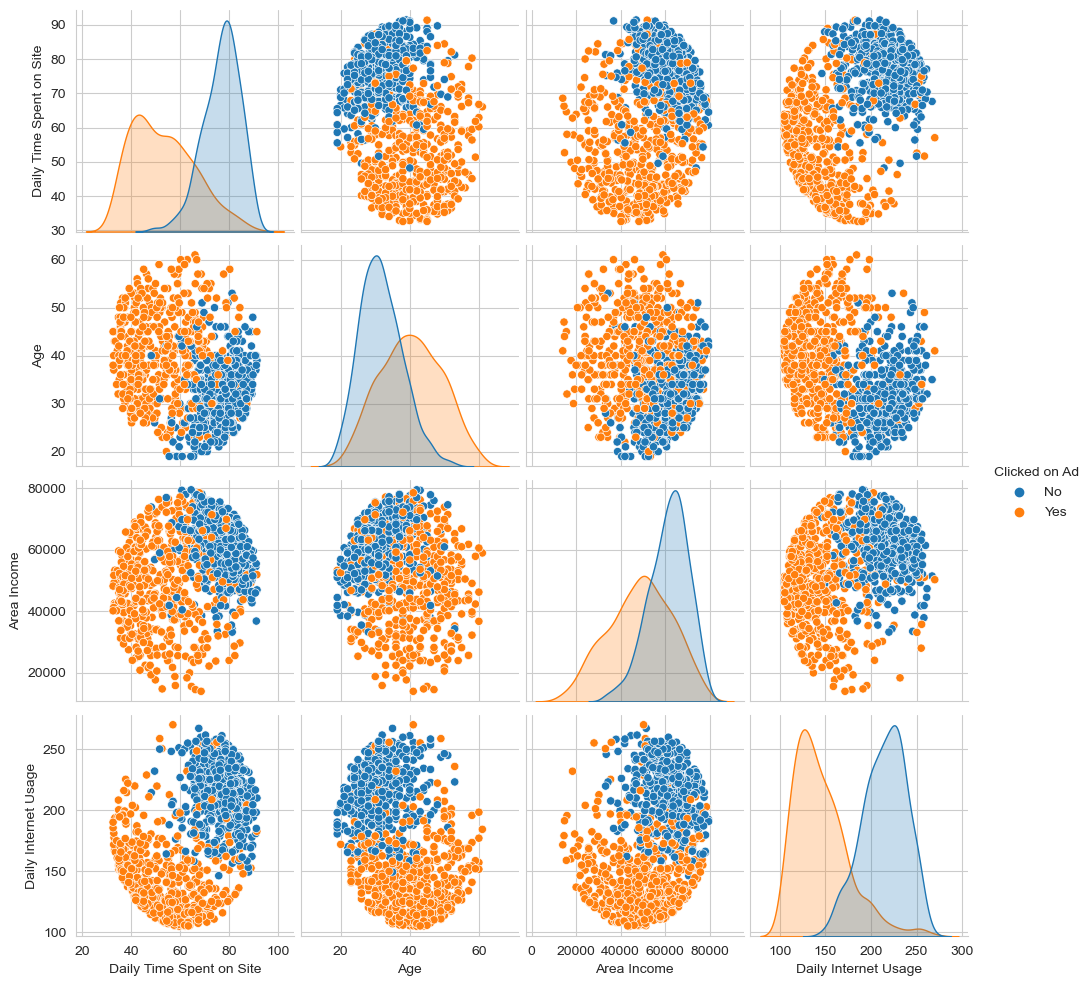

In [129]:
sns.pairplot(df,hue='Clicked on Ad')

## Explanatory Analysis

For the best quality analysis and explanation, I created a colorful and descriptive **Tableau** dashboard and story that goes over the insights about this dataset in an explanatory way. To find this Tableau dashboard you can find it at [my Tableau Public account here](https://public.tableau.com/app/profile/kyle.mair/viz/user_ad_click_analysis/Understandingourwebsiteuserscharacteristics?publish=yes).

## Building The Logistic Regression Model

The previous steps gave me a solid understanding of the dataset. In this next step, I will demonstrate how I created a Logistic Regression machine learning model to predict whether a website user will click on a recommended advertisement.

Since logistic regression models require numeric input, I need to convert categorical columns such as “Sex,” “Country,” “City,” and “Clicked on Ad” into numeric values. This process involves creating dummy variables, which are columns with boolean values (0 or 1) indicating the presence of an attribute.

For example, the “Sex” column will be converted into two separate columns: one for “Male” and one for “Female.” If a user is female, the “Male” column will have a 0 and the “Female” column will have a 1. However, to avoid multicollinearity, we drop one of these dummy columns.

For the “Clicked on Ad” column, I will programatically convert it into a binary column with 0 if the user did not click the advertisement and 1 if they did.

In [130]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Sex,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:11,No
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:02,No
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:42,No
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:19,No
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,No
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,2016-02-11 21:49:00,Yes
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,2016-04-22 02:07:01,Yes
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,2016-02-01 17:24:57,Yes
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,2016-03-24 02:35:54,No


In [131]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
city = pd.get_dummies(df['City'],drop_first=True)
country = pd.get_dummies(df['Country'], drop_first=True)
df['Clicked on Ad'] = df['Clicked on Ad'].apply(lambda x: '1' if x=='Yes' else '0').astype(int)

---

Next, I concatenated all these new numeric boolean columns back to my original dataframe to begin the model training process. I also made sure to drop any columns that I was not using anymore. I moved the 'Clicked on Ad' value to the last column in the dataframe. Now at this point I had a dataframe where each record had a value for the attributes that the Logistic Regression Model could train on.

___

In [132]:
df = pd.concat([df, sex, city, country], axis=1)

In [133]:
df['Clicked on Ad_target'] = df['Clicked on Ad']

In [134]:
df.drop(['City','Sex','Country','Clicked on Ad','Ad Topic Line', 'Timestamp'],axis=1,inplace=True)

In [135]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Adamside,Adamsstad,Alanview,Alexanderfurt,Alexanderview,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe,Clicked on Ad_target
0,68.95,35,61833.90,256.09,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
996,51.30,45,67782.17,134.42,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
997,51.63,51,42415.72,120.37,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
998,55.55,19,41920.79,187.95,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---
Now that the dataframe was in a format that would be usable by the model I divided up the data into "X" which was the features that the model would be trained on, and the "y" data, which was the data the model would be trained to predict. I then split the X and y data into "Training" and "Testing" data, where only 30% of the data would be for testing. Then I instantiated a Logistic Regression model object from the scikit-learn library, and trained it on the X and y training data split. Now I had a Logistic Regression model that was trained on the correct data

---

In [136]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df['Clicked on Ad_target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
logmodel = LogisticRegression()

In [139]:
logmodel.fit(X_train,y_train)

LogisticRegression()

---
My next goal was to see how the model performed. So on the 30% of the original data that was the testing data, I created a variable called "predictions" that stored the target values from that data the model would now attempt to predict based on the features values from the data. This is what I executed in this step. Then I used the classification report from scikit-learn to view the **Precision**, **Recall**, and **F1-Score**.

___

In [140]:
predictions = logmodel.predict(X_test)

In [142]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       157
           1       0.94      0.91      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



## Assessing the Logistic Regression Model's Results

I ended up with a classification **Precision** of 92%, a **Recall** of 94%, and an **F1-Score** of 93% for guessing if the user would not click on the advertisement. I also ended up with a classification **Precision** of 94%, a **Recall** of 91%, and an **F1-Score** of 92% for guessing if the user would click on the advertisement. But what do these scores mean? And how can we interpret the model in this instance based off these scores?

### Precision
Precision is the ability of a classification model to identify only the relevant data points, and to make sure all the models predictions on a feature being True were actually correct. A high **Precision** score essentially wants to ensure that there are not too many Type I Errors where the model predicts the feature to be true but the feature was actually false. In this instance out of the predictions my model made saying that a user would not click on an advertisement, 92% of those predictions were actually correct. Also out of all the predictions my model made saying that a user would click on an advertisement, 94% of those predictions were actually correct.

### Recall
Recall is the ability of a classification model to find all the relevant cases within a dataset, and to make sure that all the instances where the feature was actually True was predicted by the Model. A high **Recall** score wants to make sure that there are less Type II Errors where the model predicts the feature to be false, but it was actually true. In this instance out of all the instances in the dataset where the user did not click on an advertisment, my model predicted 94% of them correct. Also out of all the instances in the dataset where someone clicked on an advertisement, my model predicted 91% of them correct.

### F-1 Score
F1-Score is a metric that is essentially a blend between Precision and Recall. The **F1-Score** punishes if either recall or precision are low, so for an F1-Score to be high, both Precision and Recall must be high. The F1-Score is calculated as the *harmonic* mean between Precision and Recall. The F1-Score tries to measure how well the model balances Precision and Recall. In this instance my model balances Precision and Recall at 93% when predicting if a user will not click on an advertisement. Also my model balances Precision and Recall at 92% when predicting if a user will click on an advertisements. For this instance that is a good score.


## Conclusion
In this instance both **Precision** and **Recall** have high scores. There is a tradeoff sometimes with trying to increase one because the other will decrease as a result. In the medical field you might want a higher **Recall** to ensure no one is missed when trying to diagnose a disease. When predicting if a user will be one that will click on an advertisement the cost for sending out an advertisement is higher than a user missing an advertisment that would have been good for them. Therefore our model having a higher precision for predicting that a user will click on an advertisment is exactly what we want. This means we will not waste as much of our budget on sending advertisements to website users who will not click on the advertisement. So our model's parameters are well tuned to our business needs in this scenario. This was a successfull model creation.